In [489]:
# 시뮬레이션 라이브러리 불러오기
import cmath
import math
import matplotlib.pyplot as plt
import numpy as np

import meep as mp

In [490]:
# scaling & refractive index
um_scale = 1

Air = mp.Medium(index=1.0)

In [491]:
# 해상도 및 사이즈 설정
resolution = 50 # 1 pixel = 20 nm
o_grid = 1/resolution # 20nm

ar_thktop = round(o_grid * 0, 2)
ar_thkbottom = round(o_grid * 0, 2)

fl_thickness = round(o_grid * 0, 2)
ml_thickness_1 = round(o_grid * 10, 2) # multi layer thickness 200 nm or 100 nm
ml_thickness_2 = round(o_grid * 10, 2) # multi layer thickness 200 nm or 100 nm
ml_thickness_3 = round(o_grid * 10, 2) # multi layer thickness 200 nm or 100 nm
ml_thickness_4 = round(o_grid * 10, 2) # multi layer thickness 200 nm or 100 nm 
ml_thickness_5 = round(o_grid * 10, 2) # multi layer thickness 200 nm or 100 nm
el_thickness = round(o_grid * 2, 2) # etch layer thickness 40 nm

air_size = round(o_grid * 3, 2) # air size 60 nm

dti_size = round(o_grid * 0, 2) # DTI size 0 nm
air_thickness = round(o_grid * 15, 2) # air thickness 300 nm
dti_thickness = round(o_grid * 20, 2) # DTI thickness 400 nm
sp_size = round(o_grid * 28, 2) # subpixel size 560 nm
sd_size = round(sp_size - dti_size, 2) # real SiPD size

Lpml = round(o_grid * 10, 2) # PML thickness 400 nm 
pml_layers = [mp.PML(thickness = Lpml, direction = mp.Z)]
pml_2_src = round(o_grid * 5, 2) # PML to source 100 nm
src_2_geo = round(o_grid * 5, 2) # Source to geometry 100 nm
mon_2_pml = round(o_grid * 10, 2) # Monitor to PML 200 nm

# 설계 공간
design_region_width_x = round(sp_size * 2 , 2) # 디자인 영역 x 1120 nm
design_region_width_y = round(sp_size * 2 , 2) # 디자인 영역 y 1120 nm
design_region_height = round(1.5, 2) # 디자인 영역 높이 z 
# 전체 공간
Sx = design_region_width_x
Sy = design_region_width_y
Sz = round(Lpml +  pml_2_src + src_2_geo + ar_thktop + design_region_height + fl_thickness + ar_thkbottom + mon_2_pml + Lpml, 2)

cell_size = mp.Vector3(Sx, Sy, Sz)

In [492]:
# 파장, 주파수 설정
wavelengths = np.linspace(0.425*um_scale, 0.655*um_scale, 24) 
frequencies = 1/wavelengths
nf = len(frequencies) # number of frequencies

In [493]:
# width = 2
# fcen = 1/(0.550*um_scale)
# fwidth = fcen * width
# src = mp.GaussianSource(frequency=fcen, fwidth= fwidth, is_integrated=True)

# source_center = [0, 0, round(Sz / 2 - Lpml - pml_2_src, 2) ] # Source 위치
# source_size = mp.Vector3(Sx, Sy, 0)
# source = [mp.Source(src, component=mp.Ex, size=source_size, center=source_center, amplitude=5),mp.Source(src, component=mp.Ey, size=source_size, center=source_center,amplitude=5)]

In [494]:
# source 설정
width = 0.4

fcen_red = 1/(0.625*um_scale)
fwidth_red = fcen_red * width

fcen_green = 1/(0.545*um_scale)
fwidth_green = fcen_green * width

fcen_blue = 1/(0.455*um_scale)
fwidth_blue = fcen_blue * width

src_0 = mp.GaussianSource(frequency=fcen_red, fwidth=fwidth_red, is_integrated=True)

src_1 = mp.GaussianSource(frequency=fcen_green, fwidth=fwidth_green, is_integrated=True)

src_2 = mp.GaussianSource(frequency=fcen_blue, fwidth=fwidth_blue, is_integrated=True)

source_center = [0, 0, round(Sz / 2 - Lpml - pml_2_src, 2) ] # Source 위치
source_size = mp.Vector3(Sx, Sy, 0)

source = [mp.Source(src_0, component=mp.Ex, size=source_size, center=source_center,),mp.Source(src_0, component=mp.Ey, size=source_size, center=source_center,),
            mp.Source(src_1, component=mp.Ex, size=source_size, center=source_center,),mp.Source(src_1, component=mp.Ey, size=source_size, center=source_center,),
            mp.Source(src_2, component=mp.Ex, size=source_size, center=source_center,),mp.Source(src_2, component=mp.Ey, size=source_size, center=source_center,)]



In [495]:
sim = mp.Simulation(
    cell_size=cell_size, 
    boundary_layers=pml_layers,
    sources=source,
    default_material=Air, # 빈공간
    resolution=resolution,
    k_point = mp.Vector3(0,0,0)
)

In [496]:
tran_r = mp.FluxRegion(
    center = (0,0,round(-Sz/2 + Lpml + mon_2_pml,2)), size=mp.Vector3(design_region_width_x, design_region_width_y, 0)
)
tran_g = mp.FluxRegion(
    center = (0,0,round(-Sz/2 + Lpml + mon_2_pml,2)), size=mp.Vector3(design_region_width_x, design_region_width_y, 0)
)
tran_b = mp.FluxRegion(
    center = (0,0,round(-Sz/2 + Lpml + mon_2_pml,2)), size=mp.Vector3(design_region_width_x, design_region_width_y, 0)
)

tran_t = mp.FluxRegion(
    center = (0,0,round(-Sz/2 + Lpml + mon_2_pml,2)), size=mp.Vector3(design_region_width_x, design_region_width_y, 0))

tp = mp.FluxRegion(center = (0,0,round(-Sz/2 + Lpml + mon_2_pml,2)), size=mp.Vector3(design_region_width_x, design_region_width_y, 0))


In [497]:
nfreq = 1000

In [498]:
tran_red = sim.add_flux(np.linspace(1/(0.78 * um_scale), 1/(0.38 * um_scale), 1000), tran_r)
tran_green = sim.add_flux(np.linspace(1/(0.78 * um_scale), 1/(0.38 * um_scale), 1000), tran_g)
tran_blue = sim.add_flux(np.linspace(1/(0.78 * um_scale), 1/(0.38 * um_scale), 1000), tran_b)

In [499]:
tran_total = sim.add_flux(np.linspace(1/(0.78 * um_scale), 1/(0.38 * um_scale), 1000), tran_t)
# total_fields = sim.add_dft_fields([mp.Ez], np.linspace(1/(0.78 * um_scale), 1/(0.38 * um_scale), 1000), center=mp.Vector3(0, -Sy / 2 + pml_size + 1, 0), size=mp.Vector3(0.01, 0, 0), yee_grid=True)x


In [500]:
sim.run(until_after_sources=mp.stop_when_dft_decayed(1e-6, 0))


-----------
Initializing structure...
time for choose_chunkdivision = 3.8147e-05 s
Working in 3D dimensions.
Computational cell is 1.12 x 1.12 x 2.3 with resolution 50
time for set_epsilon = 0.283356 s
-----------
on time step 49 (time=0.49), 0.0817238 s/step
on time step 151 (time=1.51), 0.0393519 s/step
on time step 267 (time=2.67), 0.0346039 s/step
on time step 385 (time=3.85), 0.0339208 s/step
on time step 500 (time=5), 0.034829 s/step
on time step 616 (time=6.16), 0.0344842 s/step
on time step 735 (time=7.35), 0.033674 s/step
on time step 855 (time=8.55), 0.0334554 s/step
on time step 973 (time=9.73), 0.0339273 s/step
on time step 1088 (time=10.88), 0.0347962 s/step
on time step 1207 (time=12.07), 0.0339266 s/step
on time step 1326 (time=13.26), 0.0341759 s/step
on time step 1445 (time=14.45), 0.0348996 s/step
on time step 1564 (time=15.64), 0.0344247 s/step
run 0 finished at t = 15.73 (1573 timesteps)


In [501]:
red_flux = mp.get_fluxes(tran_red)
green_flux = mp.get_fluxes(tran_green)
blue_flux = mp.get_fluxes(tran_blue)
flux_freqs = mp.get_flux_freqs(tran_red)
total_flux = mp.get_fluxes(tran_total)

In [502]:
wl = []
Tr = []
Tg = []
Tb = []
dft_fields = []
Total = []
for i in range(nfreq):
    # dft_fields = np.append(dft_fields, sim.get_dft_array(total_fields, mp.Ez, i)[0])
    wl = np.append(wl, (flux_freqs[i] * um_scale))
    Tr = np.append(Tr, red_flux[i] / total_flux[i])
    Tg = np.append(Tg, green_flux[i] / total_flux[i])
    Tb = np.append(Tb, blue_flux[i] / total_flux[i])
    Total = np.append(Total, total_flux[i])

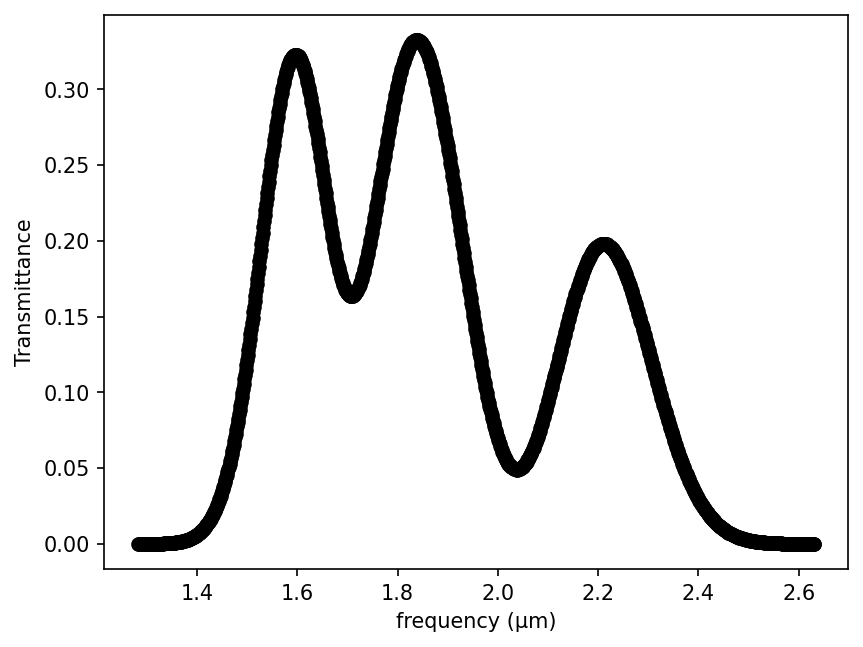

In [503]:
if mp.am_master():
    plt.figure(dpi=150)
    plt.plot(wl, -Total, "ko-")
    # print(Total)
    # plt.axis([0.38, 0.78, 0, 1])
    plt.xlabel("frequency (μm)")
    plt.ylabel("Transmittance")
    # plt.legend(loc="upper right")
    plt.show()
    

In [504]:
wl = []
Tr = []
Tg = []
Tb = []
dft_fields = []
Total = []
for i in range(nfreq):
    # dft_fields = np.append(dft_fields, sim.get_dft_array(total_fields, mp.Ez, i)[0])
    wl = np.append(wl, 1 / (flux_freqs[i] * um_scale))
    Tr = np.append(Tr, red_flux[i] / total_flux[i])
    Tg = np.append(Tg, green_flux[i] / total_flux[i])
    Tb = np.append(Tb, blue_flux[i] / total_flux[i])
    Total = np.append(Total, total_flux[i])

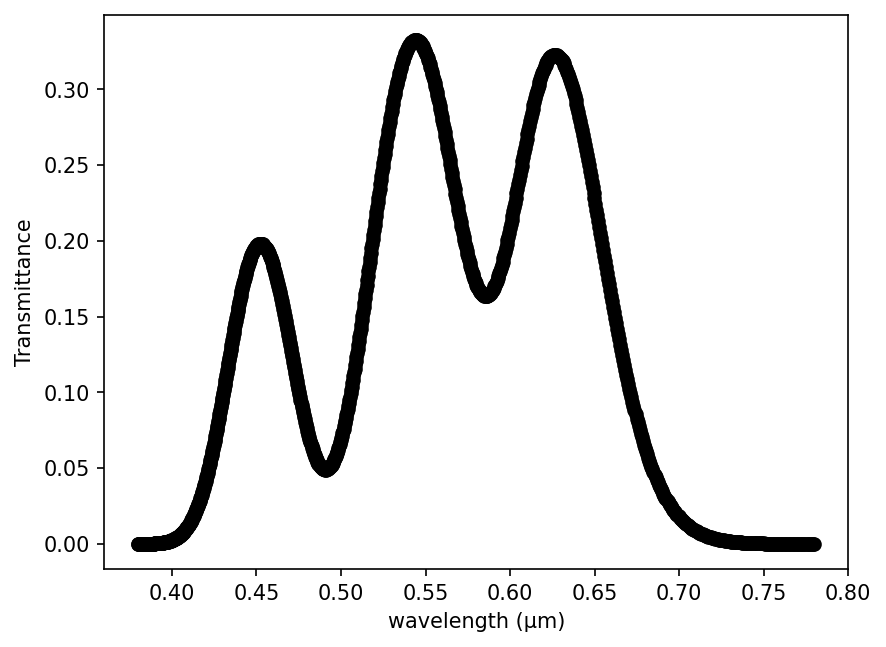

In [505]:
if mp.am_master():
    plt.figure(dpi=150)
    plt.plot(wl, -Total, "ko-")
    # print(Total)
    # plt.axis([0.38, 0.78, 0, 1])
    plt.xlabel("wavelength (μm)")
    plt.ylabel("Transmittance")
    # plt.legend(loc="upper right")
    plt.show()
    
